In [320]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [321]:
students = pd.read_csv("https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-12+11MAR2020+type@asset+block/stud_math.csv")

In [322]:
#Очистка отклоняющихся значений
def remove_outlier(df, df_col):
    '''Удаляет выбросы больше 75% + 1.5 * IQR
    и меньше 25% - 1.5 * IQR
    
    args:
    df - pd.DataFrame
    df_col - String
    '''
    perc25 = df_col.quantile(0.25)
    perc75 = df_col.quantile(0.75)
    IQR = perc75 - perc25
    lower_border = perc25 - 1.5 * IQR
    higher_border = perc75 + 1.5 * IQR
    return df.loc[(df_col > lower_border) & (df_col < higher_border)]

#Расчет границ выбросов
def outlier_scope(df_col):
    '''Находит границы выбросов и выводит значения
    (больше 75% + 1.5 * IQR
    и меньше 25% - 1.5 * IQR)
    
    args:
    df_col - pd.Series
    '''
    perc25 = df_col.quantile(0.25)
    perc75 = df_col.quantile(0.75)
    IQR = perc75 - perc25
    lower_border = perc25 - 1.5 * IQR
    higher_border = perc75 + 1.5 * IQR
    return("Границы выбросов:", lower_border, higher_border)

#Боксплот с осями x и y
def boxplot(df, x, y):
    '''Строит боксплот по x и y
    
    args:
    df - pd.DataFrame
    x - String
    y - String
    '''
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=x, y=y, data=df, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + x)
    plt.show()

#Очистка NaN
def remove_nan(df, df_col):
    '''Удаляет строки со значениями NaN в столбце df_col
    
    args:
    df - pd.DataFrame
    df_col - String
    '''
    df = df.dropna(axis='index', how='any', subset=[df_col])
        

In [323]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [324]:
students.rename(columns={'studytime, granular': 'studytime_granular'}, inplace=True)

# Анализ столбцов и очистка данных

In [325]:
students.dropna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,...,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
14,GP,M,15,U,GT3,A,2.0,2.0,other,other,...,-9.0,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,MS,M,18,R,GT3,T,2.0,1.0,other,other,...,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,5.0,35.0
386,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,...,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,...,-9.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0


school - школа 

,school
GP,349
MS,46


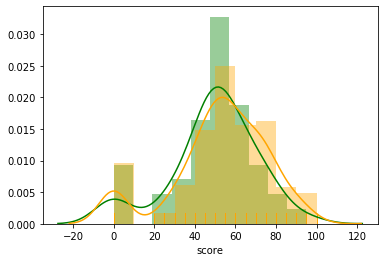

In [326]:
display(pd.DataFrame(students.school.value_counts()))

score_ms_school=students[students.school == 'MS']['score']
score_dp_school=students[students.school == 'GP']['score']
sns.distplot(score_ms_school, bins=10, label='MS', rug=True, color="green");
sns.distplot(score_dp_school, bins=10, label='DP', rug=True, color="orange");

По графику можем сделать вывод, что в школе MS экзамен пишут лучше. Но стоит также учесть, 
что данных из школы MS значительно меньше (в 7 раз), чем из школы GP.


sex - пол учеников

In [327]:
display(pd.DataFrame(students.sex.value_counts()))

,sex
F,208
M,187


Девочек и мальчиков в данной выборке примерно одинаковое количество

age — возраст ученика (от 15 до 22). Проверим, что у данного поля нет выбросов

In [328]:
students.age.unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

Все значения в границах от 15 до 22, отклоняющихся нет

address - уберем значения, в которых местро проживания неизвестно

,U,R
address,295,83


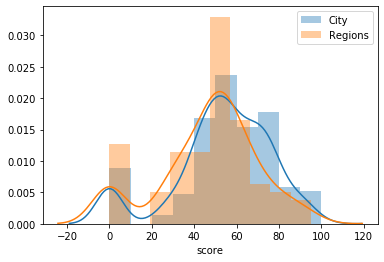

In [329]:
display(pd.DataFrame(students.address.value_counts()).transpose())

plt.figure();
sns.distplot(students[students.address == 'U']['score'], bins=10, label='City');
sns.distplot(students[students.address == 'R']['score'], bins=10, label='Regions');
plt.legend();
plt.show();

Из графика можно сделать вывод, что ученики из городов лучше пишут экзамен

famsize — размер семьи('LE3' <= 3, 'GT3' >3) 

,GT3,LE3
famsize,261,107


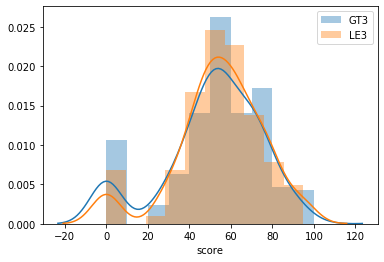

In [330]:
display(pd.DataFrame(students.famsize.value_counts()).transpose())

plt.figure();
sns.distplot(students[students.famsize == 'GT3']['score'], bins=10, label='GT3');
sns.distplot(students[students.famsize == 'LE3']['score'], bins=10, label='LE3');
plt.legend();
plt.show();

Имеем схожее распределение. Похоже размер семьи не имеет большого влияния на получаемые на экзамене оценки.

Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

students.Pstatus.unique() - проверим, что нет отклоняющихся значений

,T,A
Pstatus,314,36


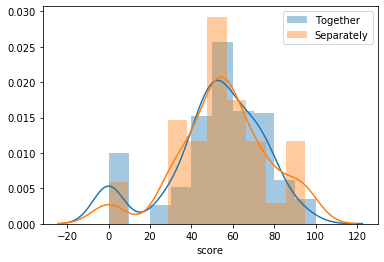

In [331]:
display(pd.DataFrame(students.Pstatus.value_counts()).transpose())

plt.figure();
sns.distplot(students[students.Pstatus == 'T']['score'], bins=10, label='Together');
sns.distplot(students[students.Pstatus == 'A']['score'], bins=10, label='Separately');
plt.legend();
plt.show();

По графику видем интересные отклонения от нормального распределения, большой у детей с родителями живущими раздельно, 
получивших 90 баллов и 30. Очень вероятно, что этот признак имеет влияние на оценку.

Medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [332]:
students.Medu.unique()  #проверим на отклоняющиеся значения

array([ 4.,  1.,  3.,  2., nan,  0.])

,4.0,2.0,3.0,1.0,0.0
Medu,131,102,97,59,3


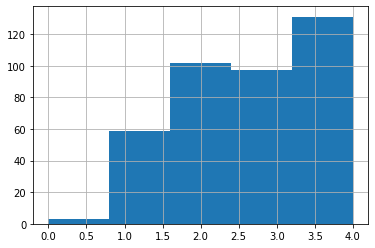

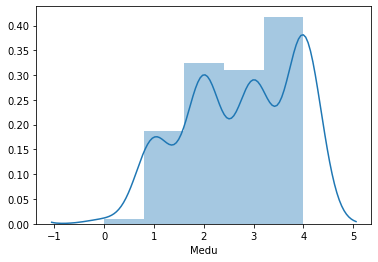

In [333]:
display(pd.DataFrame(students.Medu.value_counts()).transpose())
students.Medu.hist(bins=5)
students.Medu.describe()
plt.figure();

sns.distplot(students.Medu, bins=5);

In [334]:
outlier_scope(students.Medu)

('Границы выбросов:', -1.0, 7.0)

Fedu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [335]:
students.Fedu.unique()  #проверим на отклоняющиеся значения

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

Есть отклоняющееся значение 40, скорее всего должно было быть 4. Заменим его

In [336]:
students.Fedu.replace(40, 4, inplace=True) 

,2.0,3.0,4.0,1.0,0.0
Fedu,106,96,89,78,2


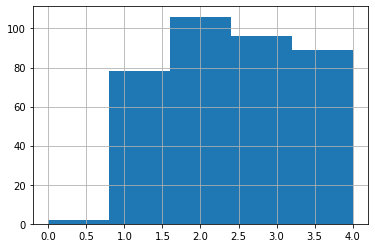

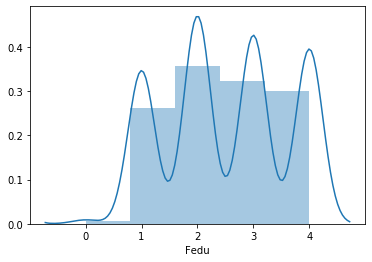

In [337]:
display(pd.DataFrame(students.Fedu.value_counts()).transpose())
students.Fedu.hist(bins=5)
students.Fedu.describe()
plt.figure();

sns.distplot(students.Fedu, bins=5);

In [338]:
outlier_scope(students.Fedu)

('Границы выбросов:', 0.5, 4.5)

Mjob - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [339]:
students.Mjob.unique() #проверим на отклоняющиеся значения

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

,other,services,at_home,teacher,health
Mjob,133,98,58,55,32


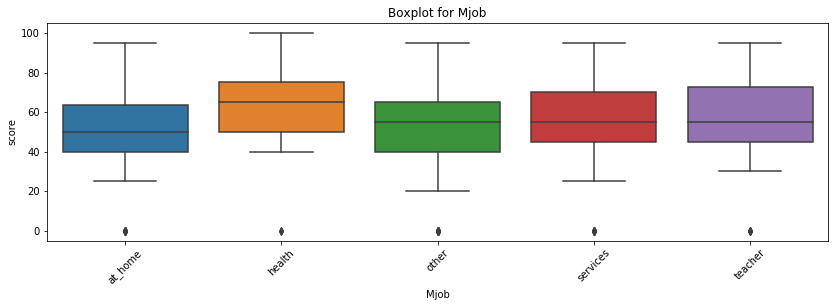

In [340]:
display(pd.DataFrame(students.Mjob.value_counts()).transpose())
boxplot(students, 'Mjob', 'score')

Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [341]:
students.Fjob.unique() #проверим на отклоняющиеся значения

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

,other,services,teacher,at_home,health
Fjob,197,102,29,16,15


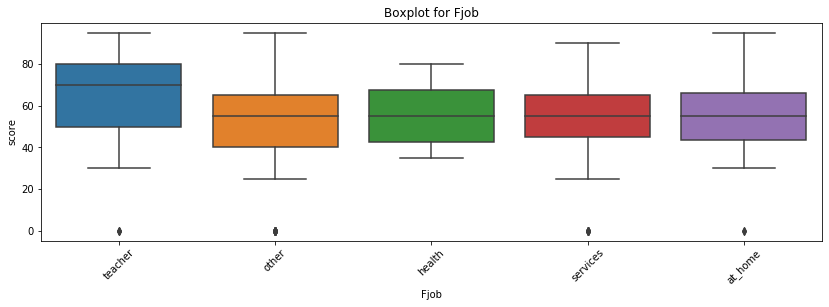

In [342]:
display(pd.DataFrame(students.Fjob.value_counts()).transpose())
boxplot(students, 'Fjob', 'score')

reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

,course,home,reputation,other
reason,137,104,103,34


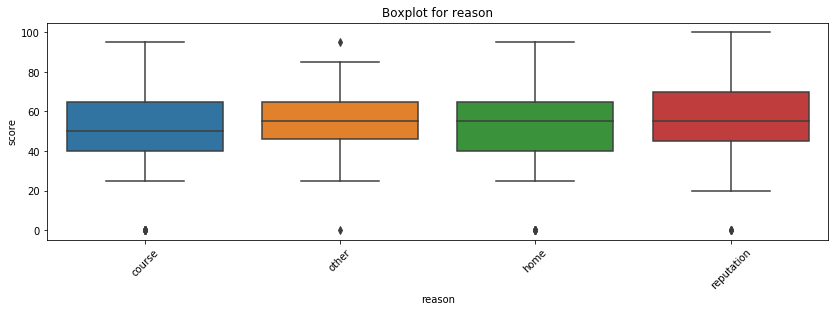

In [343]:
display(pd.DataFrame(students.reason.value_counts()).transpose())
boxplot(students,'reason','score')

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

,mother,father,other
guardian,250,86,28


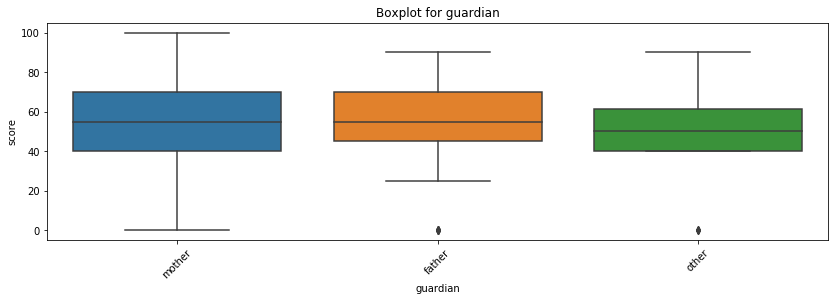

In [344]:
display(pd.DataFrame(students.guardian.value_counts()).transpose())
boxplot(students,'guardian','score')

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

,1.0,2.0,3.0,4.0
traveltime,242,96,22,7


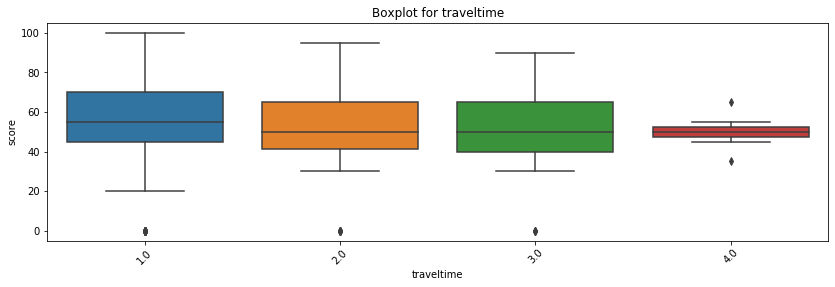

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [345]:
display(pd.DataFrame(students.traveltime.value_counts()).transpose())
boxplot(students,'traveltime','score')
students.traveltime.describe()

 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

,2.0,1.0,3.0,4.0
studytime,194,103,64,27


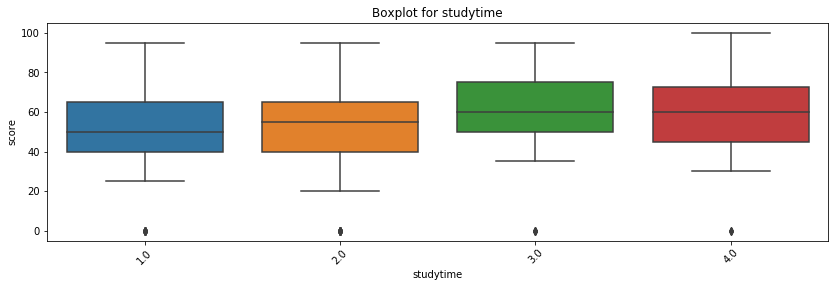

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [346]:
display(pd.DataFrame(students.studytime.value_counts()).transpose())
boxplot(students,'studytime','score')
students.studytime.describe()

studytime_granular — время на учёбу

,-6.0,-3.0,-9.0,-12.0
studytime_granular,194,103,64,27


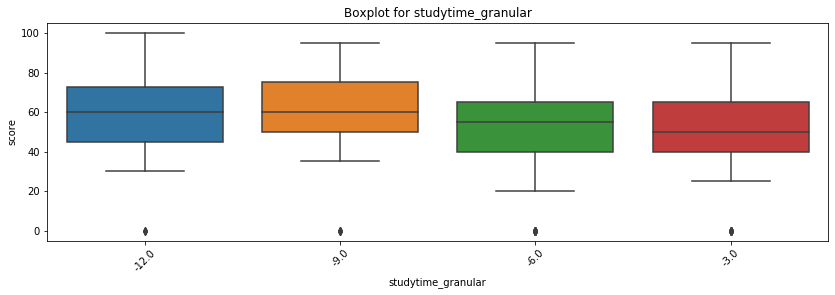

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

In [347]:
display(pd.DataFrame(students['studytime_granular'].value_counts()).transpose())
boxplot(students,'studytime_granular','score')
students.studytime_granular.describe()

failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

,0.0,1.0,2.0,3.0
failures,293,49,16,15


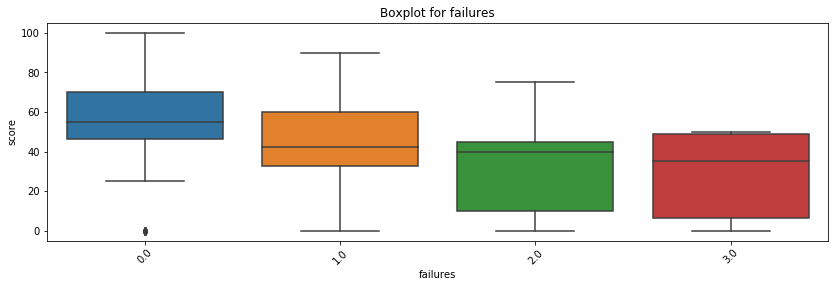

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [348]:
display(pd.DataFrame(students.failures.value_counts()).transpose())
boxplot(students,'failures','score')
students.failures.describe()

schoolsup — дополнительная образовательная поддержка (yes или no)

,no,yes
schoolsup,335,51


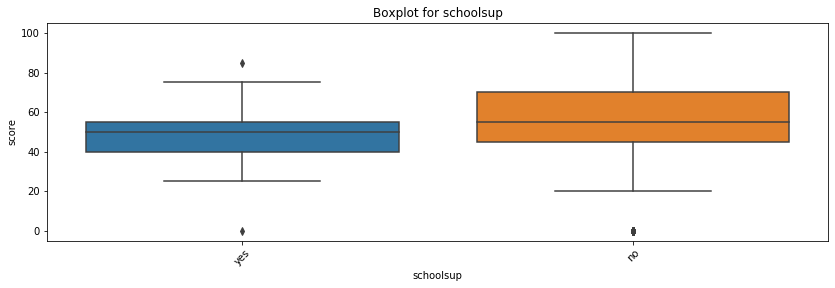

In [349]:
display(pd.DataFrame(students.schoolsup.value_counts()).transpose())
boxplot(students,'schoolsup','score')

famsup — семейная образовательная поддержка (yes или no)

,yes,no
famsup,219,137


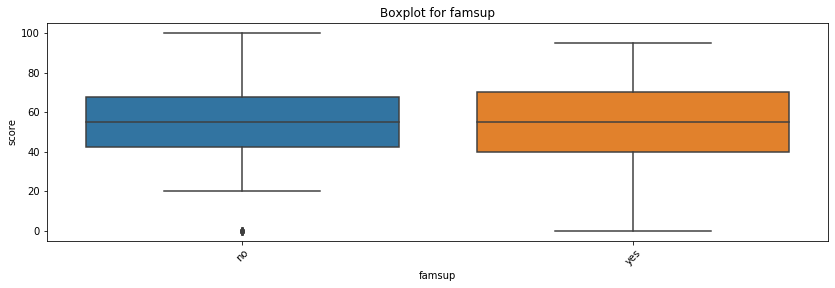

In [350]:
display(pd.DataFrame(students.famsup.value_counts()).transpose())
boxplot(students,'famsup','score')

paid — дополнительные платные занятия по математике (yes или no)

,no,yes
paid,200,155


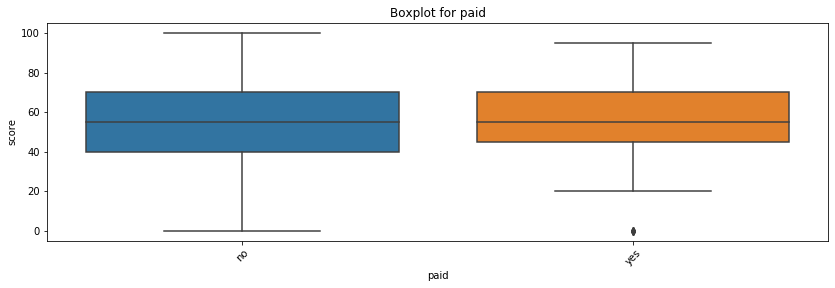

In [351]:
display(pd.DataFrame(students.paid.value_counts()).transpose())
boxplot(students,'paid','score')

activities — дополнительные внеучебные занятия (yes или no)

,yes,no
activities,195,186


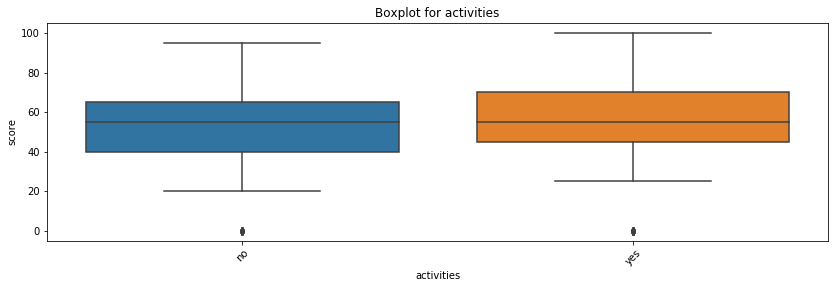

In [352]:
display(pd.DataFrame(students.activities.value_counts()).transpose())
boxplot(students,'activities','score')

nursery — посещал детский сад (yes или no)

,yes,no
nursery,300,79


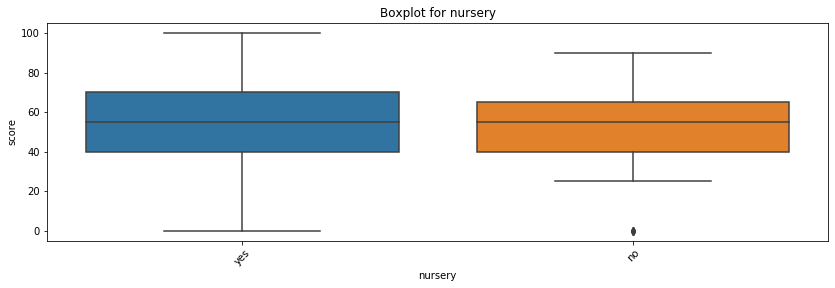

In [353]:
display(pd.DataFrame(students.nursery.value_counts()).transpose())
boxplot(students,'nursery','score')

higher — хочет получить высшее образование (yes или no)

,yes,no
higher,356,19


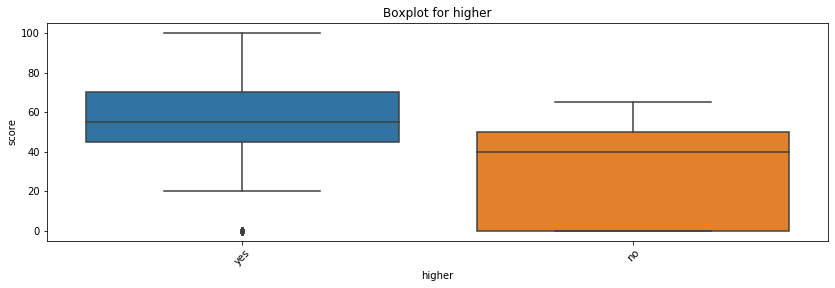

In [354]:
display(pd.DataFrame(students.higher.value_counts()).transpose())
boxplot(students,'higher','score')

internet — наличие интернета дома (yes или no)

,yes,no
internet,305,56


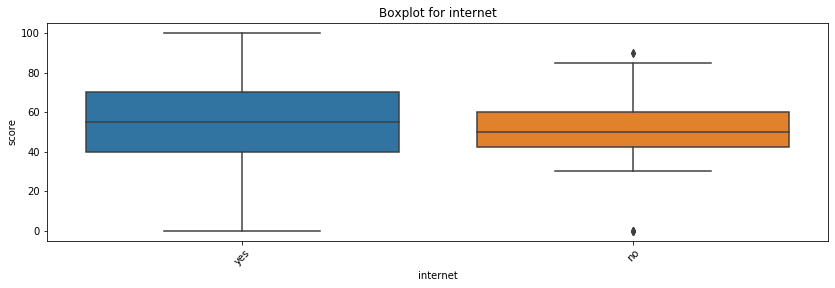

In [355]:
display(pd.DataFrame(students.internet.value_counts()).transpose())
boxplot(students,'internet','score')

romantic — в романтических отношениях (yes или no)

,no,yes
romantic,240,124


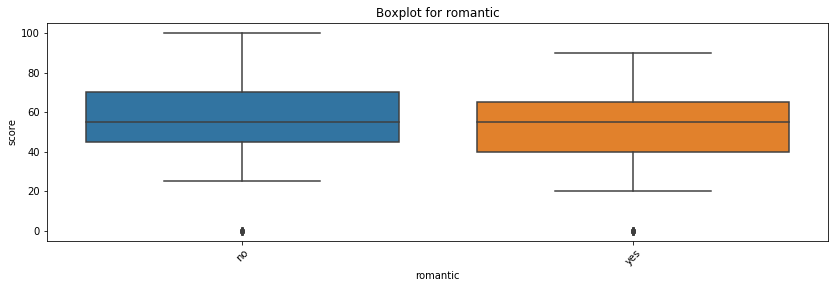

In [356]:
display(pd.DataFrame(students.romantic.value_counts()).transpose())
boxplot(students,'romantic','score')

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [357]:
display(pd.DataFrame(students.famrel.value_counts()).transpose())

,4.0,5.0,3.0,2.0,1.0,-1.0
famrel,182,99,62,17,7,1


In [358]:
students = students.loc[students.famrel != -1]# Исключим значение -1, так как оно кажется ошибочным

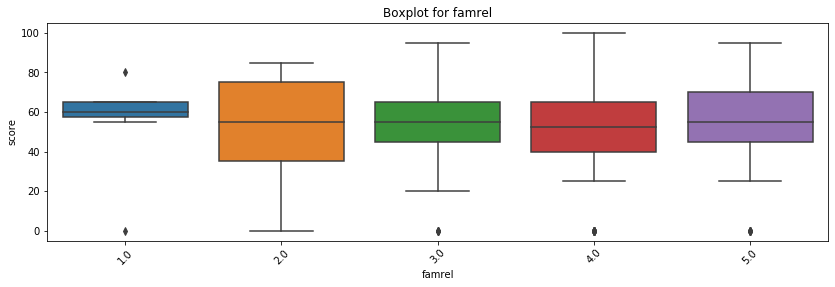

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [359]:
boxplot(students,'famrel','score')
remove_outlier(students, students.famrel)

freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)

,3.0,4.0,2.0,5.0,1.0
freetime,153,112,62,38,18


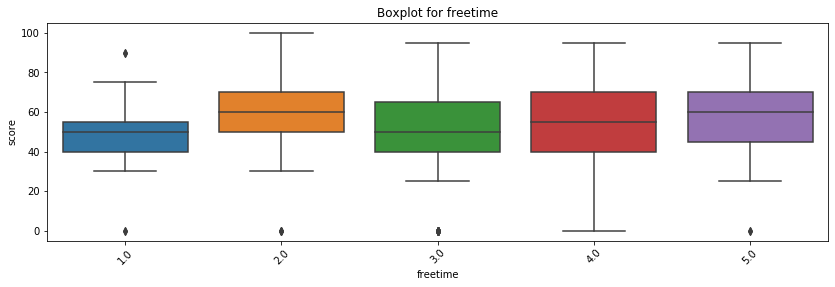

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [360]:
display(pd.DataFrame(students.freetime.value_counts()).transpose())
boxplot(students,'freetime','score')
remove_outlier(students, students.freetime)

goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

,3.0,2.0,4.0,5.0,1.0
goout,127,100,84,52,23


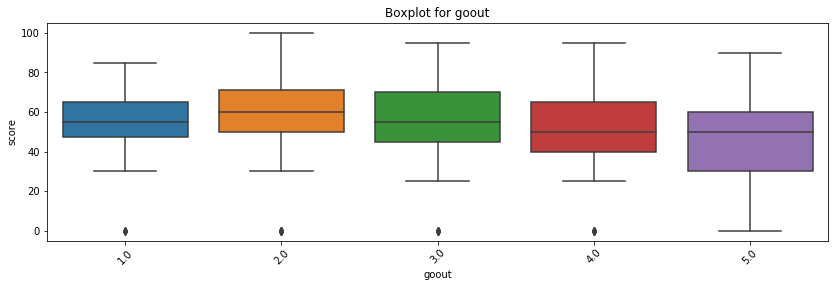

In [361]:
display(pd.DataFrame(students.goout.value_counts()).transpose())
boxplot(students,'goout','score')

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

,5.0,3.0,4.0,1.0,2.0
health,137,89,63,47,43


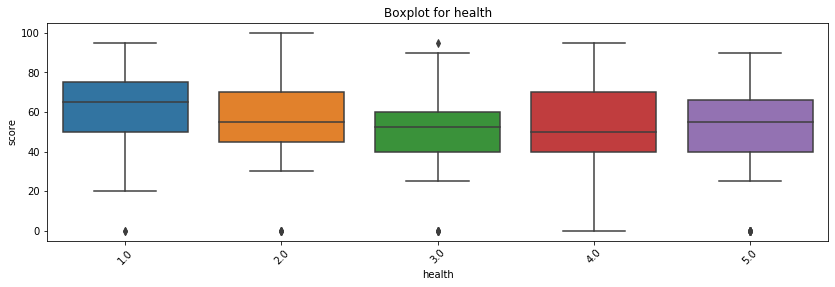

In [362]:
display(pd.DataFrame(students.health.value_counts()).transpose())
boxplot(students,'health','score')

absences — количество пропущенных занятий

In [363]:
display(pd.DataFrame(students.absences.value_counts()).transpose())
students.absences.describe()

,0.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,3.0,16.0,...,212.0,21.0,75.0,30.0,19.0,38.0,40.0,23.0,17.0,28.0
absences,111,60,53,31,21,17,12,11,8,7,...,1,1,1,1,1,1,1,1,1,1


count    382.000000
mean       7.261780
std       23.493441
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [364]:
outlier_scope(students.absences)
#Очень много 0 значений, о причине которых мы можем только догадываться, почистим их, чтобы не мешали оценке
students = students.loc[students.score != 0]

In [365]:
#Почистим выбросы
remove_outlier(students, students.absences)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


score — баллы по госэкзамену по математике

,50.0,55.0,75.0,65.0,60.0,40.0,70.0,45.0,80.0,30.0,90.0,35.0,25.0,85.0,95.0,100.0,20.0
score,54,46,33,31,31,30,27,27,16,15,12,9,7,6,5,1,1


count    351.000000
mean      57.806268
std       16.196192
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

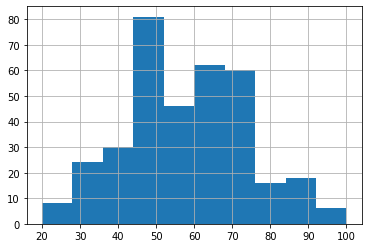

In [366]:
display(pd.DataFrame(students.score.value_counts()).transpose())
students.score.hist()
students.score.describe()

In [367]:
students.score.unique() 

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,  nan,  20.])

In [368]:
#Удалим данные с пропущенным значением score

remove_nan(students, "score")
students.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,  nan,  20.])

У многих нулевой балл за экзамен, но это навряд ли выброс, скорее всего экзамен либо не писали, либо результат по каким-то причинам обнулили.

# Корреляционный анализ

In [369]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.142623,-0.144939,0.103324,-0.010616,0.268986,0.010616,0.078431,0.017597,0.138629,-0.052311,0.108921,-0.133399
Medu,-0.142623,1.000000,0.610399,-0.175720,0.065604,-0.211879,-0.065604,-0.025925,0.004480,0.068771,-0.032660,-0.023829,0.184588
Fedu,-0.144939,0.610399,1.000000,-0.161198,-0.017163,-0.267862,0.017163,-0.032991,-0.041752,0.033040,0.026073,0.020037,0.133866
traveltime,0.103324,-0.175720,-0.161198,1.000000,-0.100138,0.113813,0.100138,-0.024705,-0.020888,0.033362,-0.008837,-0.047351,-0.077795
studytime,-0.010616,0.065604,-0.017163,-0.100138,1.000000,-0.145080,-1.000000,0.044671,-0.130519,-0.030941,-0.082793,-0.030320,0.138663
failures,0.268986,-0.211879,-0.267862,0.113813,-0.145080,1.000000,0.145080,0.048178,0.145080,0.152067,0.049331,0.086161,-0.284320
studytime_granular,0.010616,-0.065604,0.017163,0.100138,-1.000000,0.145080,1.000000,-0.044671,0.130519,0.030941,0.082793,0.030320,-0.138663
famrel,0.078431,-0.025925,-0.032991,-0.024705,0.044671,0.048178,-0.044671,1.000000,0.150605,0.041570,0.117296,-0.090022,0.030041
freetime,0.017597,0.004480,-0.041752,-0.020888,-0.130519,0.145080,0.130519,0.150605,1.000000,0.293739,0.074011,0.006900,-0.016424
goout,0.138629,0.068771,0.033040,0.033362,-0.030941,0.152067,0.030941,0.041570,0.293739,1.000000,-0.004538,-0.051043,-0.186078


По таблице корреляции видно, что значения studytime_granular и studytime обратны друг другу. Можно один из них исключить из дальнейшего анализа. 

Наибольшая корреляция баллов по математике со следующими данными: failures, Medu, age

In [370]:
students.drop(['studytime_granular'], inplace = True, axis = 1)

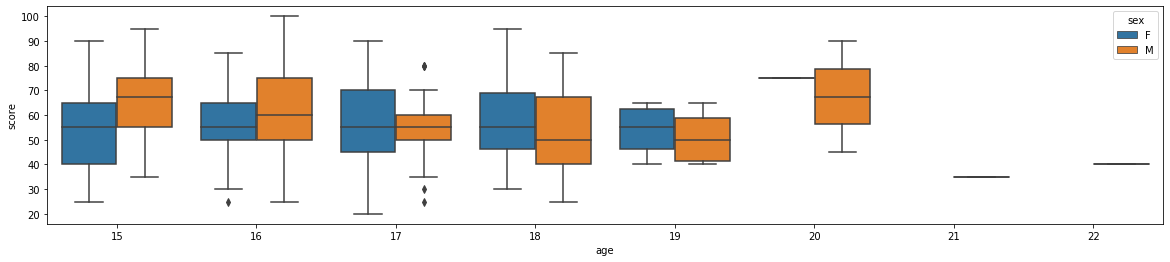

In [378]:
plt.figure(figsize=(20,4));
sns.boxplot(x="age", y="score", hue="sex", data=students);
plt.show();

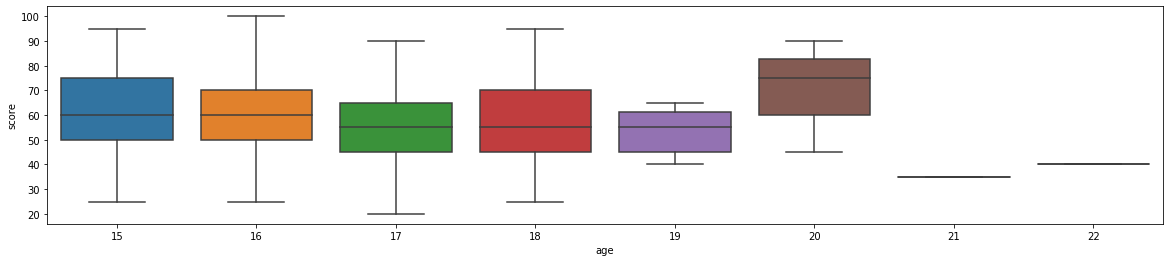

In [379]:
plt.figure(figsize=(20,4));
sns.boxplot(x="age", y="score", data=students);
plt.show();

Изучим значения баллов для учеников разного пола и возраста. Медианное для 16-18 лет правктически одинаково,
для разного возраста где-то лучше мальчики, а где-то девочки.  В 18 лет значения показатели максимально близки.
Для учеников старше 20 данных слишком мало для оценки и данные для 20 летних сильно выбиваются (возможно это те, кто готовился к экзамену дополнительный год), поэтому их лучше убрать. 

In [372]:
students_less20 = students.loc[students.age < 21]

Рассмотрим следующий важный показатель Medu

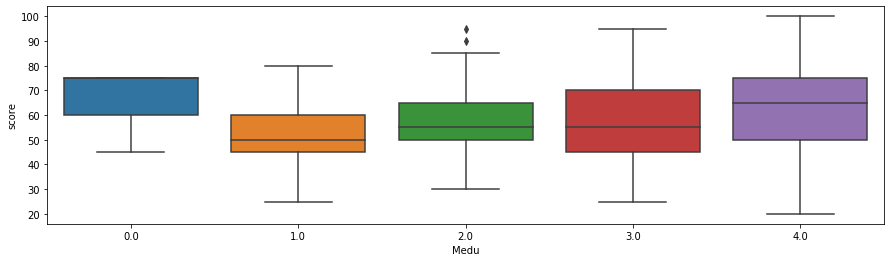

In [373]:
plt.figure(figsize=(15,4));
sns.boxplot(x="Medu", y="score", data=students_less20);
plt.show();

Для для показателя больше 0 проглядывается прямая зависимость уровня образования матери и баллов на экзамене. 

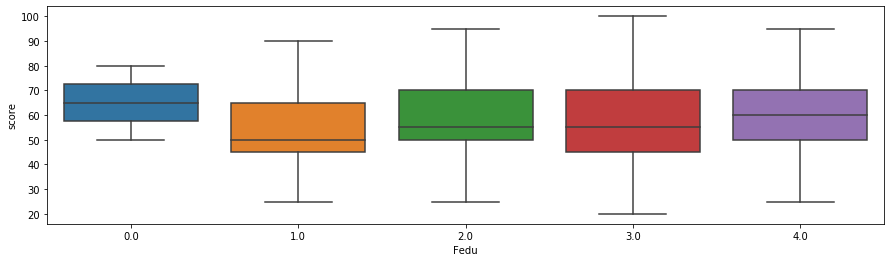

In [374]:
plt.figure(figsize=(15,4));
sns.boxplot(x="Fedu", y="score", data=students_less20);
plt.show();

Для образования отца влияния не проглядывается. Для 3 баллы ниже, чем для 2, медиана для 1, 2 и 3 практически совпадает.


Из важных числовых значений можем выделить возраст, образование матери, количество неудачных попыток, работа матери.

age,
Medu,
failures



Рассмотрим номинальные значения (по боксплотам в анализе данных)

Из важных номинальных значений можем выделить

school,
Mjob,
higher

По остальным показателям медианное значение примерно одинакого, поэтому их брать не стоит.



# Выводы

1. В целом пустых значений не так много. Удалось сохранить 346 значнеий в столбце score из 395. 

2. Выбросы есть, но их не так много. Был отсеяны учащиеся старше 20, прогулявшие очень много занятий, учащиеся получившие на экзамене 0 и не имеющие оценки.

3. Можно заметить слабую обратную корреляция между оценкой и количеством прогулов и количеством провальных попыток, по возрастам медиана схожа, но если добавить признак пола, то картина становится интереснее, у младших лучше сдают мальчики, у старших - девочки. Есть также небольшая прямая зависимость от образования матери.

По номинативным переменным можно отметить, что:

Ученики школы DP показывают лучшие результаты, чем в MS, в городе экзамен сдают лучше чем в регионах. Дети, желающие получить высшее образование сдают экзамен лучше. Учащиеся с большим количеством неудачных попыток сдают хуже. Если ученик слишком много или слишком мало гуляет, его успеваемость также падает.


4. Статистически значимые:

school,
address,
Medu,
Mjob,
studytime,
failures,
goout.

5. Коррелирующие значения:

age,
absences
